# **NumPy vs. PyTorch Tensors: A Comparison**

Both NumPy arrays and PyTorch tensors are used for numerical computations, but PyTorch tensors are specifically designed for deep learning and GPU acceleration.



# **1. Key Differences**

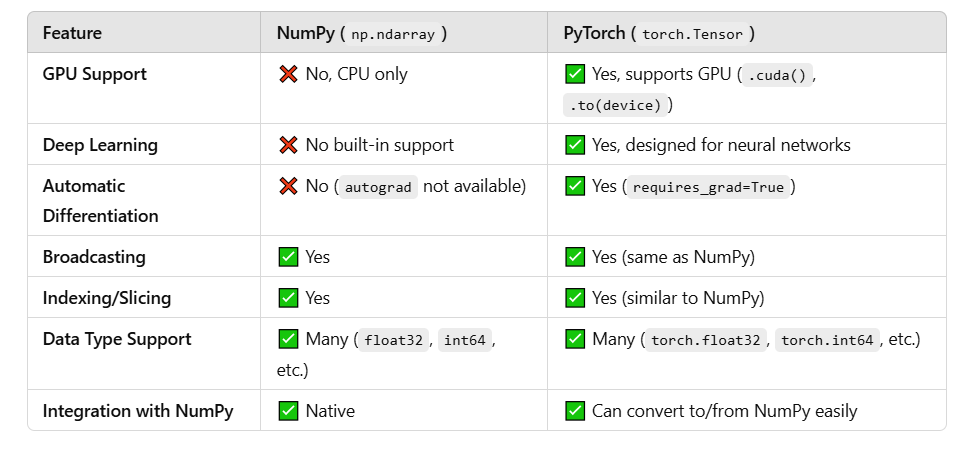

# **2. Creating Arrays & Tensors**

**NumPy**

In [1]:
import numpy as np

a = np.array([1, 2, 3])  # NumPy array
print(a)  # Output: [1 2 3]
print(a.dtype)  # Output: int64 (default)

[1 2 3]
int64


**PyTorch**

In [2]:
import torch

b = torch.tensor([1, 2, 3])  # PyTorch tensor
print(b)  # Output: tensor([1, 2, 3])
print(b.dtype)  # Output: torch.int64 (default)

tensor([1, 2, 3])
torch.int64


# **3. Moving Data to GPU (PyTorch Only)**

NumPy does not support GPU acceleration, while PyTorch allows easy transfer:

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tensor_gpu = torch.tensor([1, 2, 3], dtype=torch.float32).to(device)
print(tensor_gpu.device)  # Output: cuda:0 (if GPU is available)


cuda:0


# **4. Automatic Differentiation (PyTorch Only)**

PyTorch allows gradient computation, which is crucial for deep learning.

In [4]:
x = torch.tensor(2.0, requires_grad=True)  # Enable autograd
y = x ** 2
y.backward()  # Compute dy/dx
print(x.grad)  # Output: tensor(4.)

tensor(4.)


NumPy does not support automatic differentiation.

# **5. Interoperability: Converting Between NumPy & PyTorch**

**NumPy → PyTorch**

In [6]:
import numpy as np

In [7]:
a = np.array([1, 2, 3])
b = torch.from_numpy(a)  # Share memory!
print(b)  # tensor([1, 2, 3])

tensor([1, 2, 3])


**PyTorch → NumPy**

In [8]:
b_numpy = b.numpy()  # Share memory!
print(b_numpy)  # [1 2 3]

[1 2 3]


* The conversion is zero-copy (they share the same memory).

* If using .cuda(), move the tensor back to CPU first:

In [9]:
b.cpu().numpy()

array([1, 2, 3])

# **6. Performance Comparison**

PyTorch can utilize GPU acceleration, making it faster for large-scale computations.

**Matrix Multiplication Example**

**NumPy (CPU)**

In [10]:
import numpy as np
A = np.random.rand(1000, 1000)
B = np.random.rand(1000, 1000)

%timeit np.dot(A, B)  # Measure execution time


51.4 ms ± 4.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**PyTorch (GPU)**

In [11]:
import torch
A = torch.rand(1000, 1000, device="cuda")
B = torch.rand(1000, 1000, device="cuda")

%timeit torch.mm(A, B)  # Matrix multiplication on GPU


539 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
torch.mm(A, B)

tensor([[255.3839, 274.3926, 265.2458,  ..., 258.9691, 258.8062, 251.9890],
        [252.9460, 263.5082, 260.8248,  ..., 258.0873, 248.9270, 249.2654],
        [249.2550, 263.1033, 253.2252,  ..., 247.2368, 247.9160, 240.1418],
        ...,
        [249.9607, 264.5412, 255.6198,  ..., 251.4263, 252.2837, 244.4812],
        [250.3685, 265.8592, 256.9132,  ..., 250.1436, 254.1232, 252.2500],
        [255.4588, 265.0516, 259.1721,  ..., 254.6195, 253.6221, 251.4833]],
       device='cuda:0')

* On CPU, PyTorch and NumPy have similar performance.

* On GPU, PyTorch is significantly faster.

# **7. When to Use NumPy vs. PyTorch?**

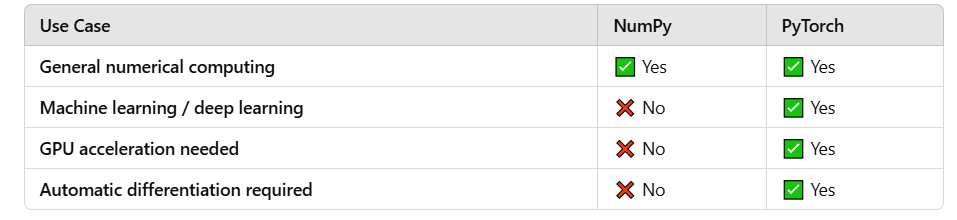

# **8. Summary**

* NumPy is great for general-purpose array computing.

* PyTorch is better for deep learning, GPU acceleration, and automatic differentiation.

* Both can be converted between each other easily.